# Titanic
As Trees and Forrests worked best in my 1. notebook, i will try to focus more on them <br>
Focusing on Forrest.
# Imports

In [1]:
import numpy as np 
import pandas as pd 


# plot
import os
import matplotlib.pyplot as plt
import seaborn as sns


import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV

from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# import warnings 
# warnings.filterwarnings('ignore')

print("imports sucessful")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


imports sucessful
/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


In [2]:
train=pd.read_csv("../input/titanic/train.csv")  #parch=number of parents on board, SibSp=nr of siblings on board  Emparked=where
test=pd.read_csv("../input/titanic/test.csv")
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
train_y=train.pop("Survived")
train
#test_y=test.pop("Survived") #has no survived

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [6]:
all_data.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [7]:
len(all_data["Cabin"].unique())  #is this good enough? probl. not
all_data.pop("Cabin")

0        NaN
1        C85
2        NaN
3       C123
4        NaN
        ... 
1304     NaN
1305    C105
1306     NaN
1307     NaN
1308     NaN
Name: Cabin, Length: 1309, dtype: object

In [8]:
#replace NaN
all_data['Fare']= all_data['Fare'].fillna(all_data['Fare'].median())
all_data['Age']= all_data.groupby(['Sex','Pclass'])['Age'].apply(lambda x:x.fillna(x.median()))
print("NaN in Age: ", all_data['Age'].isnull().sum())

NaN in Age:  0


In [9]:
all_data['Family_size']= all_data['SibSp']+all_data['Parch']+1

all_data['Title'] = all_data['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0] #has gender in  it
all_data['Surname'] = all_data['Name'].str.split(', ', expand=True)[0].str.split('.', expand=True)[0] #families might survive together



In [10]:
plotdata=all_data[:891]
plotdata["Survived"]=train_y

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
#objection! relevance!
all_data.pop('Ticket')  
all_data.pop("Name")
all_data.pop("Embarked")
all_data.pop("PassengerId")
all_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Family_size,Title,Surname
0,3,male,22.0,1,0,7.2500,2,Mr,Braund
1,1,female,38.0,1,0,71.2833,2,Mrs,Cumings
2,3,female,26.0,0,0,7.9250,1,Miss,Heikkinen
3,1,female,35.0,1,0,53.1000,2,Mrs,Futrelle
4,3,male,35.0,0,0,8.0500,1,Mr,Allen


In [12]:
# removing stuff to simplify
all_data.pop("Family_size")#just for plotting
all_data.pop("Surname")


# #onehot of removed
# all_data=pd.concat([all_data,pd.get_dummies(all_data["Surname"],prefix="Surname")], axis=1)
# all_data.drop(['Surname'],axis=1, inplace=True)

#labeling of removed
# lbl.fit(list(all_data['Surname'].values)) 
# all_data['Surname'] = lbl.transform(list(all_data['Surname'].values))

0              Braund
1             Cumings
2           Heikkinen
3            Futrelle
4               Allen
            ...      
1304          Spector
1305    Oliva y Ocana
1306          Saether
1307             Ware
1308            Peter
Name: Surname, Length: 1309, dtype: object

In [13]:
# #onehot
# all_data=pd.concat([all_data,pd.get_dummies(all_data["Sex"],prefix="sex")], axis=1)
# all_data.drop(['Sex'],axis=1, inplace=True)
# all_data=pd.concat([all_data,pd.get_dummies(all_data["Title"],prefix="Title")], axis=1)
# all_data.drop(['Title'],axis=1, inplace=True)

#labeling 
lbl= LabelEncoder()
lbl.fit(list(all_data['Title'].values)) 
all_data['Title'] = lbl.transform(list(all_data['Title'].values))
lbl.fit(list(all_data['Sex'].values)) 
all_data['Sex'] = lbl.transform(list(all_data['Sex'].values))

all_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Title
0,3,1,22.0,1,0,7.2500,12
1,1,0,38.0,1,0,71.2833,13
2,3,0,26.0,0,0,7.9250,9
3,1,0,35.0,1,0,53.1000,13
4,3,1,35.0,0,0,8.0500,12
...,...,...,...,...,...,...,...
1304,3,1,25.0,0,0,8.0500,12
1305,1,0,39.0,0,0,108.9000,3
1306,3,1,38.5,0,0,7.2500,12
1307,3,1,25.0,0,0,8.0500,12


In [14]:
all_data.drop("Title",axis=1, inplace=True )

I decided against encoding class, but it might have been ab option

In [15]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  1309 non-null   int64  
 1   Sex     1309 non-null   int64  
 2   Age     1309 non-null   float64
 3   SibSp   1309 non-null   int64  
 4   Parch   1309 non-null   int64  
 5   Fare    1309 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 61.5 KB


In [16]:
all_data.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,2.294882,0.644003,29.261398,0.498854,0.385027,33.281086
std,0.837836,0.478997,13.218275,1.041658,0.865560,51.741500
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800
50%,3.000000,1.000000,26.000000,0.000000,0.000000,14.454200
75%,3.000000,1.000000,36.000000,1.000000,0.000000,31.275000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200


# Ploting
removed ploting for the most part

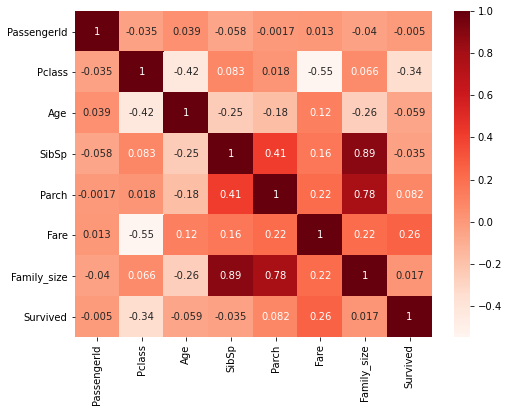

In [17]:
plt.figure(figsize=(8,6))
sns.heatmap(plotdata.corr(),annot=True,cmap='Reds')

In [18]:
train=all_data[:891]
test=all_data[891:]

In [19]:
train

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,22.0,1,0,7.2500
1,1,0,38.0,1,0,71.2833
2,3,0,26.0,0,0,7.9250
3,1,0,35.0,1,0,53.1000
4,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000
887,1,0,19.0,0,0,30.0000
888,3,0,22.0,1,2,23.4500
889,1,1,26.0,0,0,30.0000


# Models
after onehotencoding, we need way more n_estimators

In [20]:
# #RandomForrest
# modelForrest=RandomForestClassifier()

# n_estimators = [200, 400, 600]
# max_depth = [6,9,12, None]
# min_samples_split=[2,5,8]
# min_samples_leaf=[1,3,6,9]
# bootstrap = ['True', 'False']

# hyperparameter_grid = {
#     'n_estimators': n_estimators,
#     'max_depth':max_depth,
#     "min_samples_split":min_samples_split,
#     "min_samples_leaf": min_samples_leaf,
#     "bootstrap":bootstrap}

# random_cv = RandomizedSearchCV(estimator=modelForrest,
#             param_distributions=hyperparameter_grid,
#             cv=5, n_iter=50,
#             scoring='balanced_accuracy',#scoring = 'neg_mean_absolute_error',        scoring='balanced_accuracy',
#                                n_jobs = 4,
#             verbose = 5, 
#             return_train_score = True,
#             random_state=42)

# random_cv.fit(train,train_y)

In [21]:
# random_cv.best_estimator_    #if best estim are at the edge=> additional tests   

In [22]:
# # 2. TUNING WITH CLOSER VALUES AFTER SEEING THE VALUES ABOVE
# modelForrest=RandomForestClassifier()

# n_estimators = [200, 250, 300, 350]
# #max_depth = [4,5,6, None]
# min_samples_split=[12,15]
# min_samples_leaf=[1,2,3]
# bootstrap = ['True']#, 'False'

# hyperparameter_grid = {
#     'n_estimators': n_estimators,
# #    'max_depth':max_depth,
#     "min_samples_split":min_samples_split,
#     "min_samples_leaf": min_samples_leaf,
#     "bootstrap":bootstrap}

# random_cv = RandomizedSearchCV(estimator=modelForrest,
#             param_distributions=hyperparameter_grid,
#             cv=5, n_iter=50,
#             scoring='balanced_accuracy',#scoring = 'neg_mean_absolute_error',        scoring='balanced_accuracy',
#                                n_jobs = 4,
#             verbose = 5, 
#             return_train_score = True,
#             random_state=42)

# random_cv.fit(train,train_y)

In [23]:
# random_cv.best_estimator_  

In [24]:
#use best parameters
modelForrest = RandomForestClassifier(bootstrap=True,
                                      max_depth=4, max_leaf_nodes=5, 
                                      min_samples_leaf=1, min_samples_split=15, n_estimators=350,
                                      random_state=1, verbose=1,)

In [25]:
modelForrest.fit(train,train_y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    0.6s finished


RandomForestClassifier(max_depth=4, max_leaf_nodes=5, min_samples_split=15,
                       n_estimators=350, random_state=1, verbose=1)

In [26]:
# #tree
# modelTree=DecisionTreeClassifier()
# modelTree.fit(train,train_y)

In [27]:
predictions=pd.DataFrame({'PassengerId': test.index+1,
                       'Survived': modelForrest.predict(test)})

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    0.0s finished


In [28]:
predictions

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [29]:
predictions.to_csv("submit.csv", index=False)#